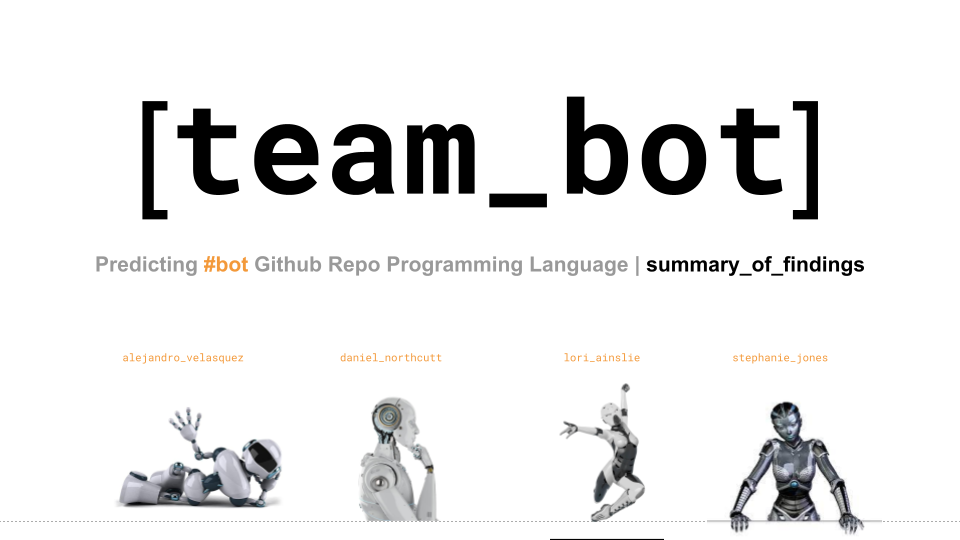

# Overview
(working links within `Jupyter Notebook`)
1. [Planning](#Planning)
2. [Acquisition](#Acquisition)
3. [Preparation](#Preparation)
4. [Exploration](#Exploration)
5. [Modeling](#Modeling)
6. [Conclusion](#Conclusion)

# Planning
[Back to the Top](#Overview)

The goal of this project was to predict the primary programming language of a github repository based on the text of the repository's `README.md` file. After some collaborative brainstorming, we decided to focus on repositories related to the search keyword **bot**. 
<br>
<br>

Our plan was to acquire the data using web scraping, clean the acquired data, and then perform exploratory analysis to determine a modeling strategy. **`Our initial hypothesis was . . . `** and some initial questions that we had of the data were as follows:
<br>1.
<br>2.
<br>3.
<br>4. 
<br>

For our primary planning tool, we used a [Trello Board](https://trello.com/b/KFt1reNg/githublanguage-prediction). 

### Data Dictionary
Target | Dtype | Description
:-- | :-- | :--
`var_name` | datatype | description

<hr>

Model Feature | Dtype | Description
:-- | :-- | :--
`var_name` | datatype | description
`var_name` | datatype | description

# Acquisition
You can find the code used to acquire the data for this project in our [acquire.py](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/c0f0c550bb07dc91ccbe29f80f545c96dffa713e/acquire.py) module in our project Github repository. We saved our imported data to the [raw_data.csv]() file which can be used to modify and test functions in the [prepare.py](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/09a331cedf4346263e58dae1fdfaed41008dddf4/prepare.py) module.<br><br>
[Back to the Top](#Overview)

<hr>

To acquire the raw data, called the function **`scrape_github_data( )`** from the [acquire.py](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/c0f0c550bb07dc91ccbe29f80f545c96dffa713e/acquire.py) module

In [1]:
# importing acquire module
import acquire

# acquiring the data
raw_data = acquire.scrape_github_data()

# verifying size
print(f'We initially acquired {raw_data.shape[0]} github repository data observations.')

We initially acquired 600 github repository data observations.


# Preparation
You can find the code used to clean, filter, and split the acquired data in our [prepare.py](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/c0f0c550bb07dc91ccbe29f80f545c96dffa713e/prepare.py) module in our Github repository. The final DataFrame of cleaned and filtered data (prior to being split) was written to the [clean_data.csv](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/09a331cedf4346263e58dae1fdfaed41008dddf4/clean_data.csv) file in our Github repository. This is the data that will be split into train, validate, and test data, stratified on our target variable `language`.
<br><br>
[Back to the Top](#Overview)
### We took the follow steps to prepare our data for exploration:
1. Normalized text
2. Created tokens from normalized text and used those tokens to lemmatize the text strings
3. Removed stop words 
4. Removed repositories with text in a natural language other than English
5. Removed repositories with text in a programming language outside of the top 5 languages
6. Split the data 

<hr>

To split the data call the **`split_data()`** function from the [prepare.py](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/c0f0c550bb07dc91ccbe29f80f545c96dffa713e/prepare.py) module.

In [2]:
import prepare

# calling function to split cleaned and filtered data
train, validate, test = prepare.split_data()

In [3]:
# preview of the data we will be exploring
train.head()

,repo,language,readme_contents,clean,lemmatized
41,facebookarchive/mention-bot,JavaScript,** THIS REPO HAS BEEN ARCHIVED AND IS NO LONGE...,repo archived longer actively maintained menti...,repo archived longer actively maintained menti...
117,pocheshire/BottomNavigationBar,C#,"# BottomNavigationBar\n<img src=""https://raw.g...",bottomnavigationbar img srchttpsrawgithubuserc...,bottomnavigationbar img srchttpsrawgithubuserc...
167,CrazyBotsz/Adv-Auto-Filter-Bot,Python,"# Adv Auto Filter Bot\r\n\r\n<p align=""center""...",adv auto filter bot p aligncenter hrefhttpsgit...,adv auto filter bot p aligncenter hrefhttpsgit...
110,jagrit007/Telegram-CloneBot,Python,# Why?\nFor all my friends using my TDs who no...,friends using tds need store everything instea...,friend using tds need store everything instead...
26,kyb3r/modmail,Python,"<div align=""center"">\n <img src=""https://i.im...",div aligncenter img srchttpsiimgurcomo558qnqpn...,div aligncenter img srchttpsiimgurcomo558qnqpn...


# Exploration
[Back to the Top](#Overview)

### Questions for Exploration:
1. Which language is represented most frequently in the data?
2. What is the average word count per language?
3. What words show up most frequently across languages?
4. Are there any words that are only found in one language?

In [4]:
import explore

In [5]:
explore.new_features(train)

,repo,language,readme_contents,clean,lemmatized,char_count,word_count
41,facebookarchive/mention-bot,JavaScript,** THIS REPO HAS BEEN ARCHIVED AND IS NO LONGE...,repo archived longer actively maintained menti...,repo archived longer actively maintained menti...,6845,801
117,pocheshire/BottomNavigationBar,C#,"# BottomNavigationBar\n<img src=""https://raw.g...",bottomnavigationbar img srchttpsrawgithubuserc...,bottomnavigationbar img srchttpsrawgithubuserc...,6182,523
167,CrazyBotsz/Adv-Auto-Filter-Bot,Python,"# Adv Auto Filter Bot\r\n\r\n<p align=""center""...",adv auto filter bot p aligncenter hrefhttpsgit...,adv auto filter bot p aligncenter hrefhttpsgit...,419,21
110,jagrit007/Telegram-CloneBot,Python,# Why?\nFor all my friends using my TDs who no...,friends using tds need store everything instea...,friend using tds need store everything instead...,3489,407
26,kyb3r/modmail,Python,"<div align=""center"">\n <img src=""https://i.im...",div aligncenter img srchttpsiimgurcomo558qnqpn...,div aligncenter img srchttpsiimgurcomo558qnqpn...,7937,652
...,...,...,...,...,...,...,...
100,KevinLage/YouTube-Livestream-Botter,Python,# 1.0 Instructions for Windows (.exe / Windows...,10 instructions windows exe windows executable...,10 instruction window exe window executable fi...,706,83
70,remixz/messenger-bot,JavaScript,# messenger-bot\n[![Build Status](https://trav...,messengerbot build statushttpstravisciorgremix...,messengerbot build statushttpstravisciorgremix...,9687,948
102,tuhinpal/WhatsBot,JavaScript,"<!-- <h1 align=""center"">\r\n <a href=""https:/...",h1 aligncenter hrefhttpsgithubcomthewhatsbotwh...,h1 aligncenter hrefhttpsgithubcomthewhatsbotwh...,4196,281
155,nodejs/github-bot,JavaScript,# Node.js GitHub Bot\n\nThe Node.js Foundation...,nodejs github bot nodejs foundation members us...,nodejs github bot nodejs foundation member use...,2942,301


# Modeling
[Back to the Top](#Overview)

# Conclusion
[Back to the Top](#Overview)